# Importing Dependancies

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Data loading, Preprocessing & Analysis

In [72]:
data = pd.read_csv('adult 3.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [73]:
# Replace '?' with empty strings.
data = data.replace('?', '')

# Convert empty strings to NaN and drop rows with NaN values
data = data.replace('', pd.NA).dropna()

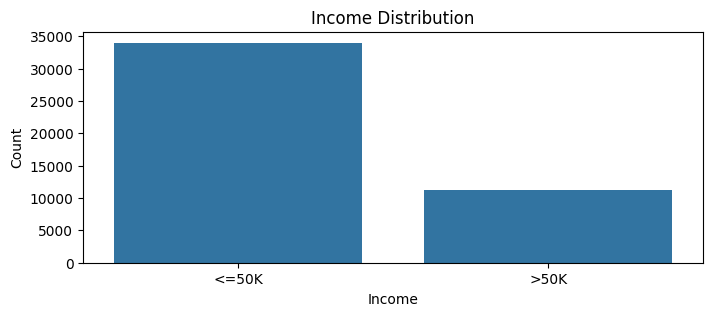

In [74]:
# Plot income distribution
plt.figure(figsize=(8, 3))
sns.countplot(x='income', data=data)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

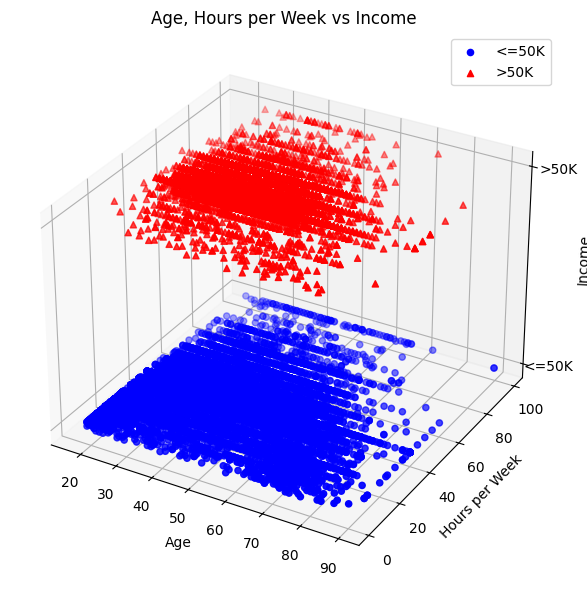

In [75]:
# age, hours-per-week Vs income
data = data[['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']]
data['income_numeric'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
fig = plt.figure(figsize=(25, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[data['income_numeric'] == 0]['age'],
           data[data['income_numeric'] == 0]['hours-per-week'],
           data[data['income_numeric'] == 0]['income_numeric'],
           c='b', marker='o', label='<=50K')
ax.scatter(data[data['income_numeric'] == 1]['age'],
           data[data['income_numeric'] == 1]['hours-per-week'],
           data[data['income_numeric'] == 1]['income_numeric'],
           c='r', marker='^', label='>50K')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per Week')
ax.set_zlabel('Income')
ax.set_title('Age, Hours per Week vs Income')
ax.set_zticks([0, 1])
ax.set_zticklabels(['<=50K', '>50K'])
ax.legend()
plt.tight_layout()
plt.show()

In [76]:
# Add 'age_slab' column
def categorize_age(age):
    if age <= 18:
        return '0-18'
    elif 19 <= age <= 30:
        return '19-30'
    elif 31 <= age <= 50:
        return '30-50'
    elif 51 <= age <= 65:
        return '50-65'
    else:
        return '65+'

data['age_slab'] = data['age'].apply(categorize_age)

<Figure size 1000x600 with 0 Axes>

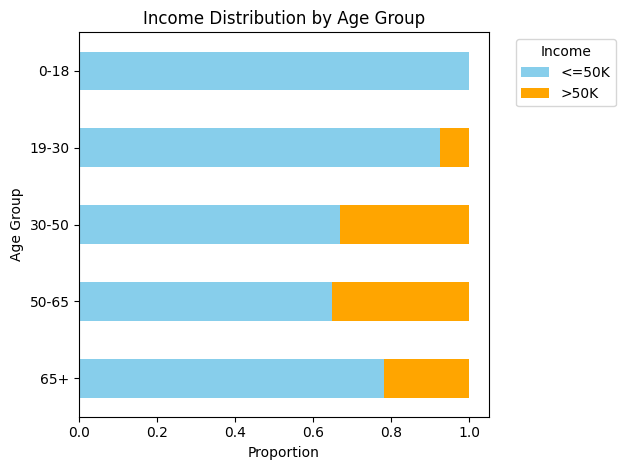

In [77]:
# Age Vs Income
income_distribution = data.groupby('age_slab')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Age Group')
plt.title('Income Distribution by Age Group')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

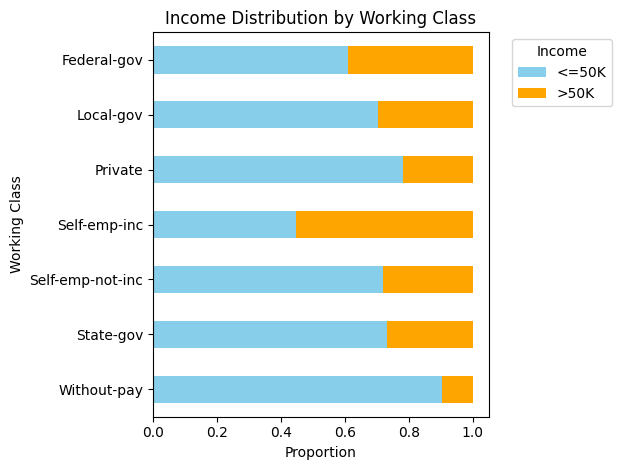

In [78]:
#Income Distribution by Working Class
income_distribution = data.groupby('workclass')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Working Class')
plt.title('Income Distribution by Working Class')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [79]:
# Encode Working Class
workclass_mapping = {
    'Federal-gov': 0,
    'Local-gov': 1,
    'Private': 2,
    'Self-emp-inc': 3,
    'Self-emp-not-inc': 4,
    'State-gov': 5,
    'Without-pay': 6
}

data['workclass_encoded'] = data['workclass'].map(workclass_mapping)

<Figure size 1000x600 with 0 Axes>

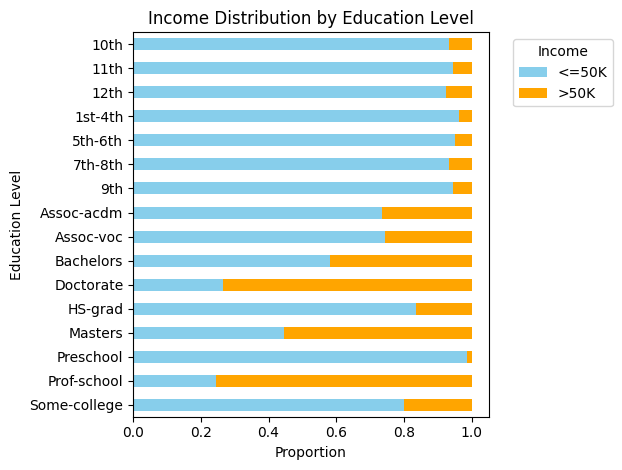

In [80]:
# Plot Income Distribution by Education level
income_distribution = data.groupby('education')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Education Level')
plt.title('Income Distribution by Education Level')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [81]:
# Encode education
education_mapping = {
    'HS-grad': 0,
    'Some-college': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Assoc-voc': 4,
    '11th': 5,
    '10th': 6,
    '7th-8th': 7,
    'Prof-school': 8,
    '9th': 9,
    '12th': 10,
    'Doctorate': 11,
    '5th-6th': 12,
    '1st-4th': 13,
    'Preschool': 14
   }

data['education_encoded'] = data['education'].map(education_mapping)

<Figure size 1000x600 with 0 Axes>

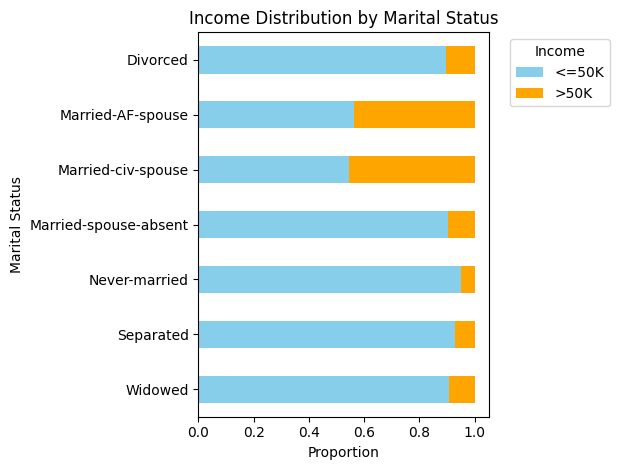

In [82]:
# marital-status Vs income
income_distribution = data.groupby('marital-status')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
# Encode marital-status
marital_mapping = {
    'Divorced': 0,
    'Married-civ-spouse': 1,
    'Never-married': 2,
    'Separated': 3,
    'Widowed': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
   }

data['marital_encoded'] = data['marital-status'].map(marital_mapping)

<Figure size 1000x600 with 0 Axes>

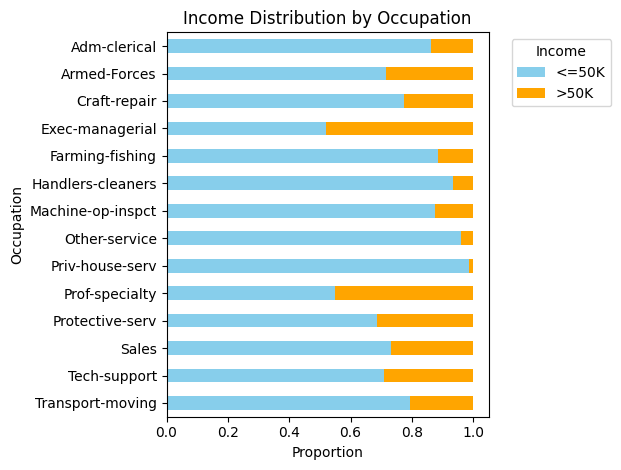

In [84]:
# occupation Vs income
income_distribution = data.groupby('occupation')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Occupation')
plt.title('Income Distribution by Occupation')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
# Encode occupation
occupation_mapping = {
    'Craft-repair': 0,
    'Prof-specialty': 1,
    'Exec-managerial': 2,
    'Adm-clerical': 3,
    'Sales': 4,
    'Other-service': 5,
    'Machine-op-inspct': 6,
    'Transport-moving': 7,
    'Handlers-cleaners': 8,
    'Farming-fishing': 9,
    'Tech-support': 10,
    'Doctorate': 11,
    'Protective-serv': 12,
    'Priv-house-serv': 13,
    'Armed-Forces': 14
   }

data['occupation_encoded'] = data['occupation'].map(occupation_mapping)

<Figure size 1000x600 with 0 Axes>

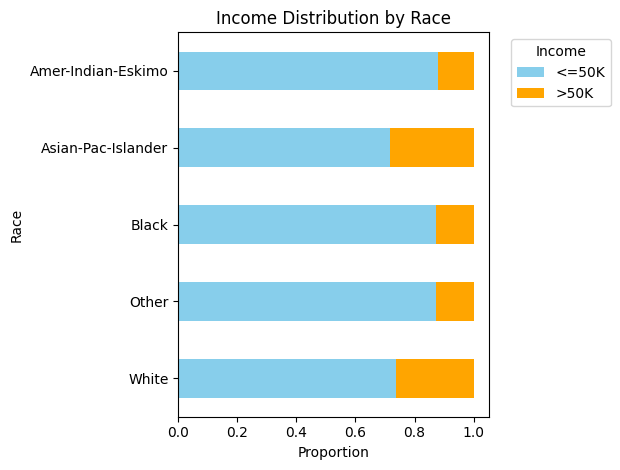

In [86]:
# race Vs income
income_distribution = data.groupby('race')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Race')
plt.title('Income Distribution by Race')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [87]:
# Encode race
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
   }

data['race_encoded'] = data['race'].map(race_mapping)

<Figure size 800x500 with 0 Axes>

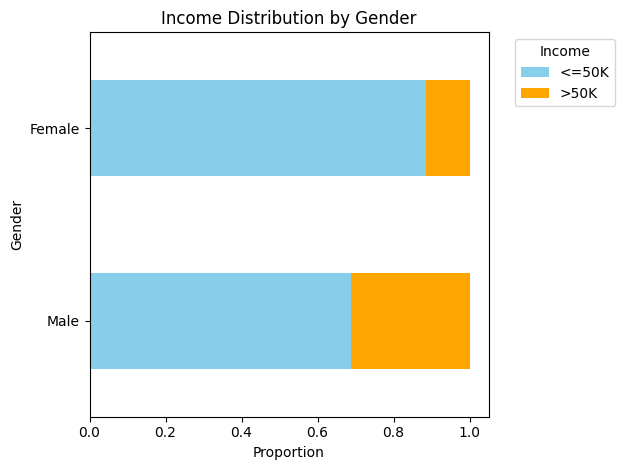

In [88]:
# gender Vs income
income_distribution = data.groupby('gender')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(8, 5))
income_distribution.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])
plt.xlabel('Proportion')
plt.ylabel('Gender')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [89]:
# Encode gender
gender_mapping = {
    'Male': 0,
    'Female': 1
   }

data['gender_encoded'] = data['gender'].map(gender_mapping)

<Figure size 1200x800 with 0 Axes>

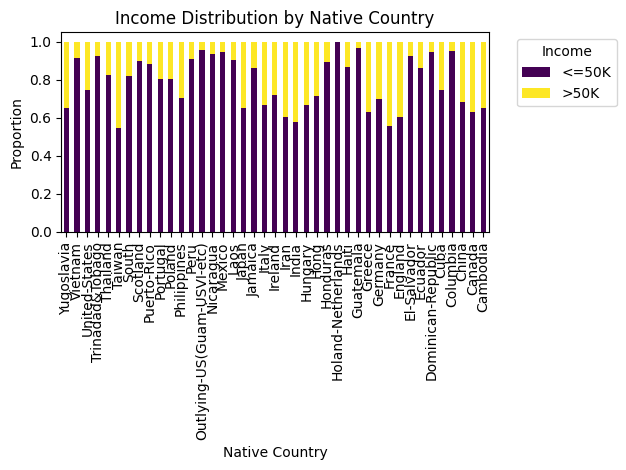

In [90]:
income_distribution = data.groupby('native-country')['income'].value_counts(normalize=True).unstack().sort_index(ascending=False)
plt.figure(figsize=(12, 8))
income_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.title('Income Distribution by Native Country')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [91]:
# Encode native-country
country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Puerto-Rico': 4,
    'Canada': 5,
    'India': 6,
    'El-Salvador': 7,
    'Cuba': 8,
    'England': 9,
    'China': 10,
    'Jamaica': 11,
    'South': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Japan': 15,
    'Guatemala': 16,
    'Vietnam': 17,
    'Columbia': 18,
    'Poland': 19,
    'Haiti': 20,
    'Portugal': 21,
    'Iran': 22,
    'Taiwan': 23,
    'Greece': 24,
    'Nicaragua': 25,
    'Peru': 26,
    'Ecuador': 27,
    'Ireland': 28,
    'France': 29,
    'Thailand': 30,
    'Hong': 31,
    'Cambodia': 32,
    'Trinadad&Tobago': 33,
    'Yugoslavia': 34,
    'Outlying-US(Guam-USVI-etc)': 35,
    'Laos': 36,
    'Scotland': 37,
    'Honduras': 38,
    'Hungary': 39,
    'Holand-Netherlands': 40
}

data['native-country_encoded'] = data['native-country'].map(country_mapping)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_16216\361167589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income', y='hours-per-week', data=data, palette='muted')


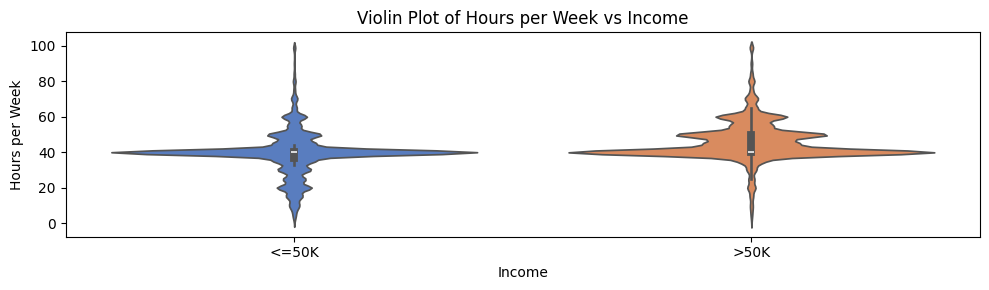

In [92]:
# hours-per-week Vs income
plt.figure(figsize=(10, 3))
sns.violinplot(x='income', y='hours-per-week', data=data, palette='muted')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Violin Plot of Hours per Week vs Income')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.tight_layout()
plt.show()

In [93]:
data = data.dropna()

In [94]:
# Seperating features & label
X = data[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_encoded', 'education_encoded', 'marital_encoded', 'occupation_encoded', 'race_encoded', 'gender_encoded', 'native-country_encoded']]
y = data['income']

In [95]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital_encoded,occupation_encoded,race_encoded,gender_encoded,native-country_encoded
0,25,226802,7,0,0,40,2,5.0,2,6,1,0,0
1,38,89814,9,0,0,50,2,0.0,1,9,0,0,0
3,44,160323,10,7688,0,40,2,1.0,1,6,1,0,0
5,34,198693,6,0,0,30,2,6.0,2,5,0,0,0
7,63,104626,15,3103,0,32,4,8.0,1,1,0,0,0


In [96]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Apply Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Random Forest Classifier

In [103]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42,class_weight='balanced')

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Model Evaluation

In [99]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

In [100]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8497


In [101]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6645
        >50K       0.73      0.60      0.66      2098

    accuracy                           0.85      8743
   macro avg       0.80      0.76      0.78      8743
weighted avg       0.84      0.85      0.84      8743



In [107]:
from joblib import dump

# Assuming 'clf' is your trained RandomForestClassifier
dump(rf_classifier, 'random_forest_model.joblib')
dump(scaler, "scaler.pkl") 

['scaler.pkl']

In [108]:
from joblib import load
model = load('random_forest_model.joblib')
test_input = np.array([[45, 150000, 16, 15000, 0, 50, 2, 14.0, 1, 5, 0, 0, 0]])
print(model.predict(test_input))

['>50K']
